In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/learn-together/train.csv
/kaggle/input/learn-together/sample_submission.csv
/kaggle/input/learn-together/test.csv


### Data analysis

In [2]:
data = pd.read_csv("/kaggle/input/learn-together/train.csv", sep=",")
X = data.drop(["Cover_Type"], axis=1)
y = pd.DataFrame(data, columns=["Cover_Type"])
test = pd.read_csv("/kaggle/input/learn-together/test.csv", sep=",")

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 55 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [4]:
X.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524,...,0.068048,0.066887,0.022520,0.057480,0.009110,0.016040,0.086932,0.083376,0.122475,0.108363
Elevation,0.185496,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,...,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,0.017702,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,...,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,...,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.099637,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,...,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.055348,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,...,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,-0.033028,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,...,0.031538,0.045797,0.021415,0.065310,0.030282,0.063302,0.197892,0.120953,0.144786,-0.105662
Hillshade_9am,0.000786,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,...,0.018760,-0.050739,0.004457,0.031228,0.013886,0.013207,0.012326,0.024492,-0.017234,-0.010286
Hillshade_Noon,0.073123,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,...,0.096261,-0.013129,0.034149,0.034638,0.029261,-0.035385,0.104682,-0.058979,-0.008203,-0.098905
Hillshade_3pm,0.042524,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,...,0.058244,0.024496,0.018298,0.000662,0.004545,-0.028055,0.069262,-0.056383,0.019158,-0.053399


In [6]:
X.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(data.Soil_Type7.unique())
print(data.Soil_Type15.unique())

[0]
[0]


In [8]:
test.corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,1.000000,0.214155,0.092892,0.204544,0.104944,0.140260,-0.422230,-0.089648,0.006710,0.045098,...,0.107127,0.183153,0.210377,0.054876,0.058366,0.007486,0.007103,0.068348,0.073584,0.076719
Elevation,0.214155,1.000000,0.017190,-0.235433,0.301484,0.094779,0.355505,0.114395,0.202892,0.054108,...,0.068658,0.166424,0.067294,0.011099,0.082783,0.020529,0.034177,0.216077,0.192343,0.211593
Aspect,0.092892,0.017190,1.000000,0.080291,0.016829,0.070680,0.024370,-0.579039,0.336859,0.648127,...,0.001673,0.057338,0.019227,0.010838,-0.022752,0.002252,-0.019301,0.016785,0.009687,-0.006404
Slope,0.204544,-0.235433,0.080291,1.000000,-0.007516,0.275015,-0.211774,-0.332269,-0.523051,-0.168955,...,-0.032890,-0.132359,0.213988,-0.010395,-0.021662,0.003071,0.007574,-0.070455,0.094372,0.027577
Horizontal_Distance_To_Hydrology,0.104944,0.301484,0.016829,-0.007516,1.000000,0.605810,0.067086,-0.026794,0.044640,0.050443,...,0.073439,0.126387,0.101370,0.070194,-0.004516,0.031791,-0.006332,0.040734,0.031486,0.144598
Vertical_Distance_To_Hydrology,0.140260,0.094779,0.070680,0.275015,0.605810,1.000000,-0.046994,-0.168682,-0.109855,0.037753,...,0.034450,0.040572,0.169527,0.061056,-0.005604,0.012848,-0.007006,-0.008921,0.043062,0.177176
Horizontal_Distance_To_Roadways,-0.422230,0.355505,0.024370,-0.211774,0.067086,-0.046994,1.000000,0.035683,0.186440,0.102556,...,-0.061572,-0.092980,-0.086677,0.005882,-0.004585,0.007078,0.015286,0.078135,0.032745,0.013418
Hillshade_9am,-0.089648,0.114395,-0.579039,-0.332269,-0.026794,-0.168682,0.035683,1.000000,0.011014,-0.780646,...,-0.035528,0.006329,-0.064769,0.007244,0.027721,0.007555,0.010235,0.015156,-0.031961,0.000664
Hillshade_Noon,0.006710,0.202892,0.336859,-0.523051,0.044640,-0.109855,0.186440,0.011014,1.000000,0.593058,...,-0.001729,0.125542,-0.088941,0.043246,0.004952,0.015801,-0.021677,0.041259,-0.071812,-0.040890
Hillshade_3pm,0.045098,0.054108,0.648127,-0.168955,0.050443,0.037753,0.102556,-0.780646,0.593058,1.000000,...,0.039788,0.083137,-0.026377,0.017675,-0.016977,0.001322,-0.021490,0.020892,-0.027176,-0.025604


In [9]:
X.drop(['Id', 'Soil_Type7', 'Soil_Type15'], axis=1, inplace=True)
test_dr = test.drop(['Id', 'Soil_Type7', 'Soil_Type15'], axis=1)

In [10]:
print(X.loc[X['Wilderness_Area1'] == True, 'Wilderness_Area1'].count())
print(X.loc[X['Wilderness_Area2'] == True, 'Wilderness_Area2'].count())
print(X.loc[X['Wilderness_Area3'] == True, 'Wilderness_Area3'].count())
print(X.loc[X['Wilderness_Area4'] == True, 'Wilderness_Area4'].count())

3597
499
6349
4675


In [11]:
data.loc[data['Cover_Type'] == 3, 'Cover_Type'].count()

2160

In [12]:
data.groupby(['Cover_Type'])['Cover_Type'].count()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

In [13]:
data.loc[(data['Wilderness_Area1'] == 1) & (data['Cover_Type'] == 1), 'Cover_Type'].count()

1062

In [14]:
WA1ind = data.loc[data['Wilderness_Area1'] == 1].index
WA2ind = data.loc[data['Wilderness_Area2'] == 1].index
WA3ind = data.loc[data['Wilderness_Area3'] == 1].index
WA4ind = data.loc[data['Wilderness_Area4'] == 1].index

In [15]:
wa1 = data.loc[WA1ind].groupby(['Cover_Type'])['Cover_Type'].count()
wa2 = data.loc[WA2ind].groupby(['Cover_Type'])['Cover_Type'].count()
wa3 = data.loc[WA3ind].groupby(['Cover_Type'])['Cover_Type'].count()
wa4 = data.loc[WA4ind].groupby(['Cover_Type'])['Cover_Type'].count()

In [16]:
print(wa1)
print(wa2)
print(wa3)
print(wa4)

Cover_Type
1    1062
2    1134
5     856
7     545
Name: Cover_Type, dtype: int64
Cover_Type
1    181
2     66
7    252
Name: Cover_Type, dtype: int64
Cover_Type
1     917
2     940
3     863
5    1304
6     962
7    1363
Name: Cover_Type, dtype: int64
Cover_Type
2      20
3    1297
4    2160
6    1198
Name: Cover_Type, dtype: int64


Text(0.5, 1.0, 'Wilderness_Area4')

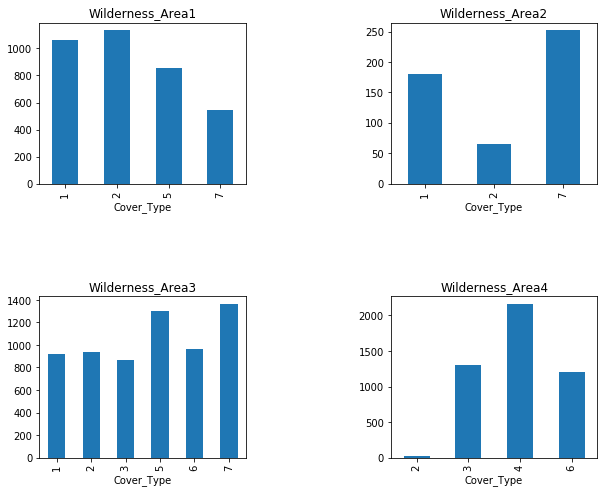

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()

fig.set_size_inches(10, 8)
fig.subplots_adjust(wspace=0.7, hspace=0.7)

wa1.plot(kind="bar", ax = ax1)
wa2.plot(kind="bar", ax = ax2)
wa3.plot(kind="bar", ax = ax3)
wa4.plot(kind="bar", ax = ax4)
ax1.set_title("Wilderness_Area1")
ax2.set_title("Wilderness_Area2")
ax3.set_title("Wilderness_Area3")
ax4.set_title("Wilderness_Area4")

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

### LogisticRegression[](http://)

In [19]:
lr = LogisticRegression(solver="liblinear")

lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)

In [20]:
accuracy_score(y_valid, y_pred)

0.6762566137566137

In [21]:
y_pred_train = lr.predict(X_train)

accuracy_score(y_train, y_pred_train)

0.6747685185185185

### Support Vector Machine

In [22]:
scaler = StandardScaler()

X_sc = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
test_dr_sc = pd.DataFrame(scaler.transform(test_dr), columns=test_dr.columns)
X_train_sc = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_valid_sc = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

In [23]:
clf = SVC(gamma="auto", random_state=42)

clf.fit(X_train_sc, y_train)

y_pred = clf.predict(X_valid_sc)
y_pred_train = clf.predict(X_train_sc)

In [24]:
accuracy_score(y_valid, y_pred)

0.7414021164021164

In [25]:
accuracy_score(y_train, y_pred_train)

0.7417328042328042

### K Nearest Neighbours

In [26]:
scaler = MinMaxScaler()  #RobustScaler()  StandardScaler()

X_sc = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
test_dr_sc = pd.DataFrame(scaler.transform(test_dr), columns=test_dr.columns)
X_train_sc = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_valid_sc = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns)

In [27]:
k_values = np.arange(1, 11)

accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(k_values):
    clf = KNeighborsClassifier(n_neighbors=value)
    
    clf.fit(X_train_sc, y_train)
    
    y_pred = clf.predict(X_valid_sc)
    y_pred_train = clf.predict(X_train_sc)
        
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    #if i% 2 == 0: 
    print('K = {}'.format(value))
    print('\tacc_valid = {}'.format(acc_valid))
    print('\tacc_train = {}\n'.format(acc_train))
    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

K = 1
	acc_valid = 0.8227513227513228
	acc_train = 1.0

K = 2
	acc_valid = 0.7847222222222222
	acc_train = 0.9252645502645502

K = 3
	acc_valid = 0.8111772486772487
	acc_train = 0.9016203703703703

K = 4
	acc_valid = 0.7976190476190477
	acc_train = 0.8817791005291006

K = 5
	acc_valid = 0.7946428571428571
	acc_train = 0.8620205026455027

K = 6
	acc_valid = 0.7890211640211641
	acc_train = 0.8502810846560847

K = 7
	acc_valid = 0.7890211640211641
	acc_train = 0.8372189153439153

K = 8
	acc_valid = 0.7827380952380952
	acc_train = 0.8286210317460317

K = 9
	acc_valid = 0.7748015873015873
	acc_train = 0.8198578042328042

K = 10
	acc_valid = 0.7724867724867724
	acc_train = 0.814484126984127



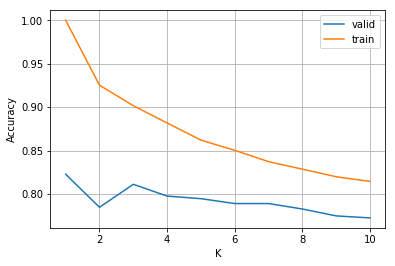

In [28]:
plt.plot(k_values, accuracy_on_valid, label="valid")
plt.plot(k_values, accuracy_on_train, label="train")

plt.xlabel('K')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()

plt.show()

In [29]:
clf = KNeighborsClassifier(n_neighbors=1)

clf.fit(X_train_sc, y_train)

y_pred = clf.predict(X_valid_sc)

accuracy_score(y_valid, y_pred)

0.8227513227513228

### DecisionTreeClassifier

In [30]:
max_depth_values = np.arange(2, 20)

accuracy_on_valid = []
accuracy_on_train = []

for i, value in enumerate(max_depth_values):
    clf = DecisionTreeClassifier(max_depth=value, random_state=42)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
        
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    print('T = {}'.format(value))
    print('\tacc_valid = {}'.format(acc_valid))
    print('\tacc_train = {}\n'.format(acc_train))
    
    accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

T = 2
	acc_valid = 0.47453703703703703
	acc_train = 0.47858796296296297

T = 3
	acc_valid = 0.5846560846560847
	acc_train = 0.609292328042328

T = 4
	acc_valid = 0.6299603174603174
	acc_train = 0.6490575396825397

T = 5
	acc_valid = 0.6484788359788359
	acc_train = 0.6653439153439153

T = 6
	acc_valid = 0.691468253968254
	acc_train = 0.705191798941799

T = 7
	acc_valid = 0.7152777777777778
	acc_train = 0.7300760582010583

T = 8
	acc_valid = 0.732473544973545
	acc_train = 0.7642195767195767

T = 9
	acc_valid = 0.7556216931216931
	acc_train = 0.7933201058201058

T = 10
	acc_valid = 0.7609126984126984
	acc_train = 0.824156746031746

T = 11
	acc_valid = 0.7734788359788359
	acc_train = 0.8538359788359788

T = 12
	acc_valid = 0.7820767195767195
	acc_train = 0.886656746031746

T = 13
	acc_valid = 0.7996031746031746
	acc_train = 0.9131944444444444

T = 14
	acc_valid = 0.8025793650793651
	acc_train = 0.9365079365079365

T = 15
	acc_valid = 0.7986111111111112
	acc_train = 0.9528769841269841

T = 

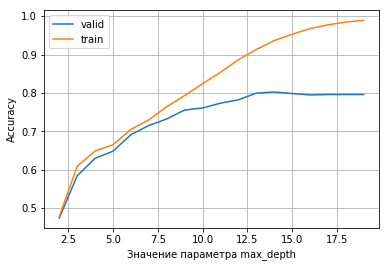

In [31]:
plt.rcParams['figure.figsize'] = 6, 4

plt.plot(max_depth_values, accuracy_on_valid, label="valid")
plt.plot(max_depth_values, accuracy_on_train, label="train")

plt.xlabel('Значение параметра max_depth')
plt.ylabel('Accuracy')

plt.legend()
plt.grid()

plt.show()

In [32]:
clf = DecisionTreeClassifier(max_depth=14, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.8025793650793651

### RandomForestClassifier with CV

In [33]:
parameters = {
    'n_estimators': [300, 500],
    'max_features': [9, 12], #np.arange(5, 9),
    'max_depth': [9, 12] #np.arange(5, 10),
}

clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=parameters,
    scoring='accuracy',
    cv=5,
    return_train_score = True
)

In [34]:
#clf.fit(X, y)

In [35]:
#cv_results = pd.DataFrame(clf.cv_results_)

#cv_results.columns

In [36]:
"""
param_columns = [
    column
    for column in cv_results.columns
    if column.startswith('param_')
]

score_columns = ['mean_test_score', 'mean_train_score']

cv_results = (cv_results[param_columns + score_columns]
              .sort_values(by=score_columns, ascending=False))

cv_results
"""

"\nparam_columns = [\n    column\n    for column in cv_results.columns\n    if column.startswith('param_')\n]\n\nscore_columns = ['mean_test_score', 'mean_train_score']\n\ncv_results = (cv_results[param_columns + score_columns]\n              .sort_values(by=score_columns, ascending=False))\n\ncv_results\n"

In [37]:
#clf.best_params_

In [38]:
clf = RandomForestClassifier(max_depth=12, max_features=12, n_estimators=500, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.8293650793650794

### XGBClassifier with CV

In [39]:
parameters = {
    'n_estimators': [800, 1200],
    'seed': [1200, 1400]
}

clf = GridSearchCV(
    estimator=XGBClassifier(silent=False, nthread=4, max_depth=10, subsample=0.5, learning_rate=0.03, random_state=42),
    param_grid=parameters,
    scoring='accuracy',
    cv=5,
    return_train_score = True
)

In [40]:
#clf.fit(X, y)

In [41]:
#cv_results = pd.DataFrame(clf.cv_results_)

#cv_results.columns

In [42]:
"""
param_columns = [
    column
    for column in cv_results.columns
    if column.startswith('param_')
]

score_columns = ['mean_test_score', 'mean_train_score']

cv_results = (cv_results[param_columns + score_columns]
              .sort_values(by=score_columns, ascending=False))

cv_results
"""

"\nparam_columns = [\n    column\n    for column in cv_results.columns\n    if column.startswith('param_')\n]\n\nscore_columns = ['mean_test_score', 'mean_train_score']\n\ncv_results = (cv_results[param_columns + score_columns]\n              .sort_values(by=score_columns, ascending=False))\n\ncv_results\n"

In [43]:
#clf.best_params_

In [44]:
model_xgb = XGBClassifier(silent=False, nthread=4, max_depth=10, n_estimators=1200, subsample=0.5, learning_rate=0.03, seed=1400, random_state=42)

model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.8855820105820106

In [45]:
print(model_xgb.feature_importances_)

[0.0460544  0.00667312 0.00597821 0.00954969 0.00681423 0.00852698
 0.00960739 0.00685324 0.00606428 0.00821091 0.02464107 0.01709772
 0.01619157 0.07252574 0.01472894 0.02135651 0.05561622 0.03643083
 0.03178197 0.01442956 0.         0.01379842 0.04220117 0.01151419
 0.06713484 0.03055966 0.00980091 0.00885126 0.01803336 0.0258151
 0.01441811 0.01789222 0.00474726 0.023784   0.01097714 0.01455423
 0.         0.01339087 0.01482245 0.03163398 0.01016062 0.04426554
 0.01097168 0.01529779 0.01207528 0.0167484  0.02961474 0.0096577
 0.         0.01610226 0.02738276 0.01466156]


## Output data

In [46]:
#res = test[['Id']].copy()

In [47]:
#model_xgb = XGBClassifier(silent=False, nthread=4, max_depth=10, n_estimators=1200, subsample=0.5, learning_rate=0.03, seed=1400, random_state=42)

#model_xgb.fit(X, y)

#pred = model_xgb.predict(test_dr)
#pred

In [48]:
#res = pd.concat([res, pd.DataFrame(pred, columns=['Cover_Type'])], axis=1)

In [49]:
#res.to_csv("ForestsVIV.csv", sep=",", index=False)

## KNN

In [50]:
res = test[['Id']].copy()

In [51]:
scaler = MinMaxScaler()  #RobustScaler()  StandardScaler()

X_sc = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
test_dr_sc = pd.DataFrame(scaler.transform(test_dr), columns=test_dr.columns)

In [52]:
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_sc, y)

pred = clf.predict(test_dr_sc)
pred

array([2, 1, 1, ..., 3, 3, 3])

In [53]:
res = pd.concat([res, pd.DataFrame(pred, columns=['Cover_Type'])], axis=1)

In [54]:
res.to_csv("ForestsVIV_3.csv", sep=",", index=False)